# Chapter 2

## 2.11 Correlation


For this developed code, we will charge the data that we downloaded from the [
Canada Weather Stats](weatherstats.ca) from the Vancouver location using the option `Climate Daily/Forecast/Sun` option setting the `row limit` to 10 000. This data was downloaded on February 7th of 2025. Take into account that due to be using data from more recent years in here, the results will not be exactly the same as in the results shown in the book but the data can be analyzed with the same procedures.

In [2]:
import pandas as pd

In [3]:
# Load the data
df = pd.read_csv("../data/weatherstats_vancouver_daily.csv")
print
# Convert the date column to datetime object
df['date'] = pd.to_datetime(df['date'])

# Display the first few rows of the dataframe
df.tail()

/tmp/ipykernel_19902/2973357021.py:2: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/weatherstats_vancouver_daily.csv")


,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
9995,1997-09-26,17.1,14.66,14.95,12.8,NaN,NaN,99,83.7,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,1997-09-25,19.6,17.24,17.10,14.6,NaN,NaN,97,84.9,81.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,1997-09-24,21.3,16.32,15.75,10.2,NaN,NaN,100,83.0,77.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,1997-09-23,20.1,15.93,15.70,11.3,NaN,NaN,100,86.7,84.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,1997-09-22,25.5,17.05,18.00,10.5,28.0,NaN,100,79.8,74.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.11.1 Pearson correlation

This implementation is relatively a simple one that will only imply us to calculate the pearson correlation and plot the data of the book using the corresponding magnitudes they compared.

In [4]:
from scipy.stats import pearsonr

First, let's create some data to replicate the scatter plots con Figure 2.4. 

In [14]:
import numpy as np

In [15]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate x values
x1 = np.linspace(0, 100, 1000)
x2 = np.linspace(0, 100, 1000)
x3 = np.linspace(0, 100, 1000)
x4 = np.linspace(0, 100, 1000)
x5 = np.linspace(0, 100, 1000)
x6 = np.linspace(0, 100, 1000)

# Generate y values with progressively increasing noise
y1 = x1 + np.random.normal(0, 5, x1.shape)
y2 = x2 + np.random.normal(0, 10, x2.shape)
y3 = x3 + np.random.normal(0, 20, x3.shape)
y4 = -x4 + np.random.normal(0, 5, x4.shape)
y5 = -x5 + np.random.normal(0, 10, x5.shape)
y6 = -x6 + np.random.normal(0, 20, x6.shape)

Also, we will implement naively the pearson correlation algorithm shown in the book to show you how you could write it on your own

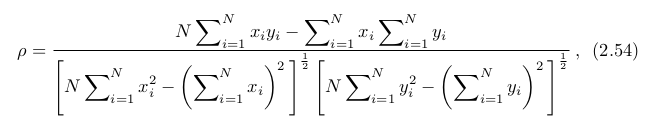

<span style="color: teal"> <b>Note:</b> I must mention libraries that implement this kind of calculations usually develop more efficient algorithms that optimize them, and that's the reason why I say this is an initial naive implementation, because it may not be the best implementation out there</span>

In [ ]:
def naive_pearsonr(x: np.ndarray[np.float64], 
                   y: np.ndarray[np.float64]) -> float:
    """
    Calculate the Pearson correlation coefficient between two arrays using a naive implementation.

    Parameters:
    x (np.ndarray[np.float64]): First input array.
    y (np.ndarray[np.float64]): Second input array.

    Returns:
    float: Pearson correlation coefficient between the two arrays.
    """
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_sq = np.sum(x**2)
    sum_y_sq = np.sum(y**2)
    sum_xy = np.sum(x * y)
    
    numerator = n * sum_xy - sum_x * sum_y
    denominator = np.sqrt((n * sum_x_sq - sum_x**2) * (n * sum_y_sq - sum_y**2))
    
    return numerator / denominator

# Example usage
corr_y6 = naive_pearsonr(x6, y6)
print(f'Naive Pearson correlation coefficient for x6 and y6: {corr_y6:.2f}')

Naive Pearson correlation coefficient for x6 and y6: -0.83


Let's plot!

In [19]:
import matplotlib.pyplot as plt

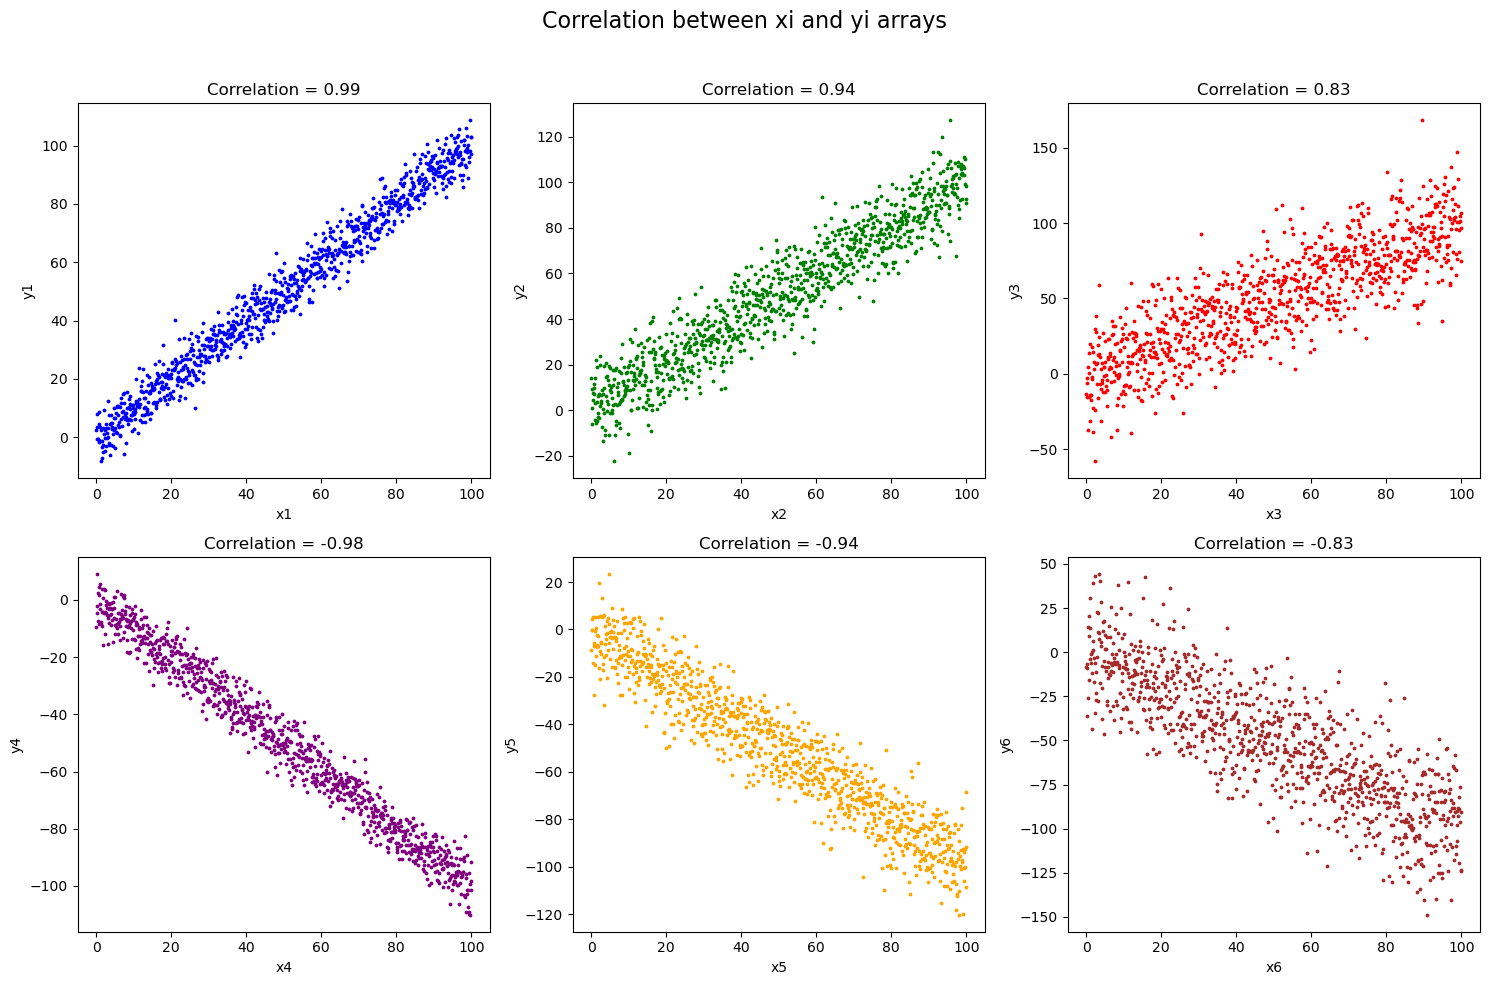

In [18]:
# Calculate correlations
corr_y1 = naive_pearsonr(x1, y1)
corr_y2 = naive_pearsonr(x2, y2)
corr_y3 = naive_pearsonr(x3, y3)
corr_y4 = naive_pearsonr(x4, y4)
corr_y5 = naive_pearsonr(x5, y5)
corr_y6 = naive_pearsonr(x6, y6)

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Correlation between xi and yi arrays', fontsize=16)

# Plot x1 vs y1
ax[0, 0].scatter(x1, y1, s=3, color='blue')
ax[0, 0].set_title(f'Correlation = {corr_y1:.2f}')
ax[0, 0].set_xlabel('x1')
ax[0, 0].set_ylabel('y1')

# Plot x2 vs y2
ax[0, 1].scatter(x2, y2, s=3, color='green')
ax[0, 1].set_title(f'Correlation = {corr_y2:.2f}')
ax[0, 1].set_xlabel('x2')
ax[0, 1].set_ylabel('y2')

# Plot x3 vs y3
ax[0, 2].scatter(x3, y3, s=3, color='red')
ax[0, 2].set_title(f'Correlation = {corr_y3:.2f}')
ax[0, 2].set_xlabel('x3')
ax[0, 2].set_ylabel('y3')

# Plot x4 vs y4
ax[1, 0].scatter(x4, y4, s=3, color='purple')
ax[1, 0].set_title(f'Correlation = {corr_y4:.2f}')
ax[1, 0].set_xlabel('x4')
ax[1, 0].set_ylabel('y4')

# Plot x5 vs y5
ax[1, 1].scatter(x5, y5, s=3, color='orange')
ax[1, 1].set_title(f'Correlation = {corr_y5:.2f}')
ax[1, 1].set_xlabel('x5')
ax[1, 1].set_ylabel('y5')

# Plot x6 vs y6
ax[1, 2].scatter(x6, y6, s=3, color='brown')
ax[1, 2].set_title(f'Correlation = {corr_y6:.2f}')
ax[1, 2].set_xlabel('x6')
ax[1, 2].set_ylabel('y6')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

We will take advantage here of an already implemented algorithm of the person correlation coefficient on the [`Scipy` library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). 

In [17]:
from scipy.stats import pearsonr

Let's charge the corresponding magnitudes and the calculation of their pearson correlation values using `Scipy` implementation.

In [5]:
# Charging the magnitudes data from the first 2000 points
rel_humid = df["max_relative_humidity"]
temp = df["max_temperature"]
wind_speed = df["max_wind_speed"]
pressure = df["avg_pressure_sea"]

In [6]:
# Correlation calculation
corr_temp_humid, _ = pearsonr(temp, rel_humid)
corr_temp_wind, _ = pearsonr(temp, wind_speed)
corr_temp_pressure, _ = pearsonr(temp, pressure)
corr_wind_pressure, _ = pearsonr(wind_speed, pressure)

Proceed with the plot!

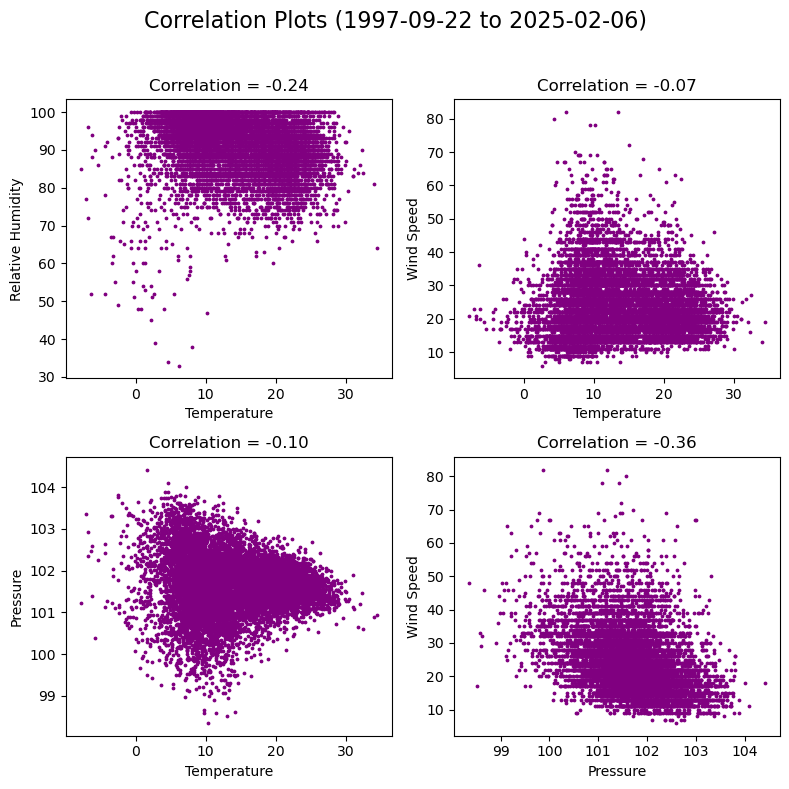

In [ ]:
# Get the date range from the dataframe
date_range = f"{df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}"

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle(f'Correlation Plots ({date_range})', fontsize=16)

ax[0, 0].scatter(temp, rel_humid, s=3, color='purple')
ax[0, 0].set_title(f'Correlation = {corr_temp_humid:.2f}')
ax[0, 0].set_xlabel('Temperature')
ax[0, 0].set_ylabel('Relative Humidity')

ax[0, 1].scatter(temp, wind_speed, s=3, color='purple')
ax[0, 1].set_title(f'Correlation = {corr_temp_wind:.2f}')
ax[0, 1].set_xlabel('Temperature')
ax[0, 1].set_ylabel('Wind Speed')

ax[1, 0].scatter(temp, pressure, s=3, color='purple')
ax[1, 0].set_title(f'Correlation = {corr_temp_pressure:.2f}')
ax[1, 0].set_xlabel('Temperature')
ax[1, 0].set_ylabel('Pressure')

ax[1, 1].scatter(pressure, wind_speed, s=3, color='purple')
ax[1, 1].set_title(f'Correlation = {corr_wind_pressure:.2f}')
ax[1, 1].set_ylabel('Wind Speed')
ax[1, 1].set_xlabel('Pressure')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


As stated by the book, you must remember that the pearson correlation coefficient only analyzes linearity relation, then if the data presents other kind of non-linear relationship, the pearson correlation coefficient result could be misleading. Let's plot the corresponding example of this.

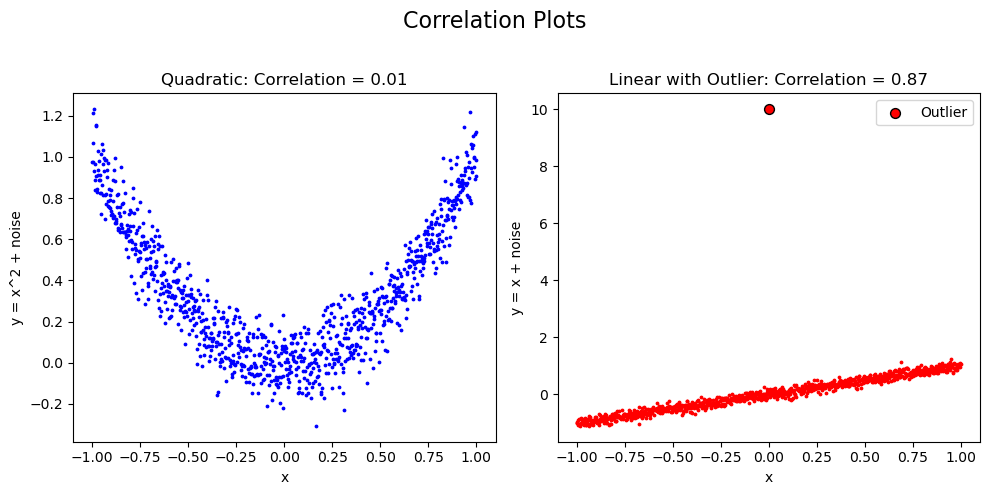

In [24]:
# Generate x values
x = np.linspace(-1, 1, 1000)

# Generate y values with noise
y_quad = x**2 + np.random.normal(0, 0.1, x.shape)
y_linear = x + np.random.normal(0, 0.1, x.shape)

# Introduce an outlier in the linear data
y_linear[500] = 10

# Calculate correlations
corr_quad, _ = pearsonr(x, y_quad)
corr_linear, _ = pearsonr(x, y_linear)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Correlation Plots', fontsize=16)

# Plot quadratic data
ax[0].scatter(x, y_quad, s=3, color='blue')
ax[0].set_title(f'Quadratic: Correlation = {corr_quad:.2f}')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y = x^2 + noise')

# Plot linear data with outlier
ax[1].scatter(x, y_linear, s=3, color='red')
ax[1].scatter(x[500], y_linear[500], s=50, color='red', edgecolor='black', label='Outlier')
ax[1].set_title(f'Linear with Outlier: Correlation = {corr_linear:.2f}')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y = x + noise')
ax[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 2.11.2